In [5]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import math 

def is_number(s):
# to judge whether the feature value is integer
    try:
        float(s)
        return True
    except ValueError:
        pass

    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass

    return False

def feature_eng(data):
    std = StandardScaler()
    #data = data.replace('none', 0)
    data = data.fillna(0)
    #print(data.penalty)
#if feature value is not interger, factorize it
    for name in data.columns:
        if (name == 'penalty'):
            data[name] = pd.factorize(data[name].values)[0]+1
        if (name =='alpha'):
            temp = data[name].map(lambda x:-math.log10(x))
            data[name] = temp
#             print('ssssss')

#new feature
    data['max_iter*n_samples'] = data['max_iter']* data['n_samples']* data['n_classes'] 
    
    data['tt'] = pd.Series(list(lab))
    data = data.drop(['id', 'flip_y'], axis = 1)
    data['n_jobs'] = 1/data['n_jobs']
#     data= normalize(data, norm='l1')
    data = data.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
#     data = (data - data.mean()) / (data.std())
    #print(data)
    # df = data
    # data = (df - df.min()) / (df.max() - df.min())
#     num_pca = 8
#     pca = PCA(n_components=num_pca)
#     pca.fit(data)
#     columns = ['pca_%i' % i for i in range(num_pca)]
#     data = pd.DataFrame(pca.transform(data), columns=columns, index=data.index)
    

    #print(df_pca.head())
    #print(data)
    
    return data

In [6]:
train_lab = pd.read_csv('./data/train_data1.csv').T
lab = train_lab[1].append(pd.read_csv("./data/res_v19.csv")['time'][1:])
lab.shape

(500,)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn import model_selection
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model
from sklearn import neural_network
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV




train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")
test_label = pd.read_csv("./data/gt.csv")
train_len = len(train_data)

train_data['n_jobs'][train_data['n_jobs'] == -1] = 8
test_data['n_jobs'][test_data['n_jobs'] == -1] = 16

all_proc = feature_eng(train_data.iloc[:, :-1].append(test_data.iloc[:, 1:], ignore_index=True))
train = all_proc[:]
test = all_proc[train_len:]
label = train_data.time.append(test_label.iloc[:,1])
# train = all_proc[:train_len]
# test = all_proc[train_len:]
# label = train_data.time

     alpha  l1_ratio  max_iter  n_classes  n_clusters_per_class  n_features  \
0      1.0  0.254865  0.350838      0.250              0.333333    0.115242   
1      0.5  0.784872  0.530726      0.250              1.000000    0.139671   
2      0.0  0.807567  0.541899      0.000              1.000000    0.577801   
3      0.5  0.468191  0.811173      0.500              1.000000    0.107807   
4      0.5  0.368666  0.071508      0.750              1.000000    0.283590   
5      0.5  0.323364  0.986592      0.250              0.000000    0.398832   
6      1.0  0.823429  0.922905      0.375              0.000000    0.308550   
7      1.0  0.228291  0.356425      0.875              1.000000    0.332979   
8      0.0  0.832950  0.229050      0.000              0.666667    0.574084   
9      0.5  0.185979  0.454749      0.875              1.000000    0.368030   
10     1.0  0.960458  0.420112      0.625              0.666667    0.497610   
11     1.0  0.592793  0.174302      1.000           

/Users/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nick/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [8]:
model = XGBRegressor(learning_rate= 0.1, n_estimators=1000, 
                    max_depth=3, min_child_weight= 6, seed= 1,
                    subsample= 0.8, colsample_bytree= 0.4, 
                    gamma=0, reg_alpha=0.05, reg_lambda=0.1)
model1 = tree.DecisionTreeRegressor()
model2 = LinearRegression()
model3 = svm.SVR()
model4 = neighbors.KNeighborsRegressor()
model5 = linear_model.SGDClassifier()
model6 = neural_network.MLPRegressor(hidden_layer_sizes = (50,25, 16 ,1))
model7 = ensemble.GradientBoostingRegressor(n_estimators=1200)
model8 = ensemble.ExtraTreesRegressor(n_estimators=500)
model9 = ensemble.RandomForestRegressor(n_estimators=2000, random_state = 0)
model10 = ensemble.AdaBoostRegressor(model7)
model11 = ensemble.BaggingRegressor(model7)
param_grid={"hidden_layer_sizes": [(100,90,80,70,60,50), (90,90,80,70,60,50)]}
model12 = GridSearchCV(model6, param_grid=param_grid,verbose=2)


def gen(model):
    model.fit(train, label)
    predicted = model.predict(test)

    df = pd.DataFrame({'id':{},'time':{}})
    df.id = test_data.id
    df.time = pd.Series(predicted)
    df.time[df.time<0] = 0
    df.to_csv('./data/res_v21.csv', index = 0)


def crossV(model):
  kf = model_selection.KFold(n_splits=5, shuffle=False, random_state=1)
  scores = model_selection.cross_val_score(model, train, label, scoring='mean_squared_error', cv=kf)

  print(scores)
  print(scores.mean())

def plot_importance(forest):
    forest.fit(train, label)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(train.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(train.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(train.shape[1]), indices)
    plt.xlim([-1, train.shape[1]])
    plt.show()

Feature ranking:
1. feature 12 (0.278326)
2. feature 7 (0.159609)
3. feature 13 (0.128266)
4. feature 9 (0.117831)
5. feature 5 (0.091438)
6. feature 2 (0.033730)
7. feature 8 (0.027424)
8. feature 1 (0.025733)
9. feature 10 (0.025353)
10. feature 4 (0.025044)
11. feature 3 (0.023437)
12. feature 6 (0.022816)
13. feature 11 (0.021763)
14. feature 0 (0.019230)


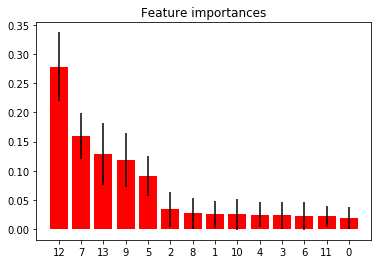

In [10]:
# crossV(model7)
# gen(model)
plot_importance(model8)

In [ ]:
crossV(model)

In [ ]:
gen(model7)